In [1]:
import random
import statistics

import matplotlib.pyplot as plt

In [2]:
CAPITAL: float = 100.0
CHANGE_IN_RATE_OF_RETURN: float = 0.01
DAYS: int = 100
N_SIMULATIONS: int = 1000
RISK_FREE_RATE: float = 0.0
WINNING_RATE: float = 0.51

In [3]:
GAIN_RATE: float = 1*CHANGE_IN_RATE_OF_RETURN
LOSS_RATE: float = -1*CHANGE_IN_RATE_OF_RETURN

In [4]:
def monte_carlo(
    capital: float, days: int, 
    gain_rate: float, loss_rate: float,
    winning_rate: float,
) -> list[float]:
    """ 以蒙地卡羅法模擬交易'days'次，並回傳每次交易的報酬率
    Args:
        capital (float): 總資產
        days (int): 交易次數
        gain_rate (float): 模擬正報酬率
        loss_rate (float): 模擬負報酬率
        winning_rate (float): 交易員的勝率

    Returns:
        list[float]: 每日報酬率
    """
    daily_returns = []
    for _ in range(days):
        if random.random() < winning_rate:
            capital *= (1 + gain_rate)
            daily_returns.append(gain_rate)
        else:
            capital *= (1 + loss_rate)
            daily_returns.append(loss_rate)
    return daily_returns

In [5]:
def calculate_sharpe_ratio(daily_returns: list[float], risk_free_rate: float) -> float:
    """ 計算夏普比率
    Args:
        daily_returns (list[float]): 傳每次交易的報酬率
        risk_free_ratio (float): 無風險利率

    Returns:
        float: 夏普比率
    
    """
    mean = statistics.mean(daily_returns)
    std = statistics.stdev(daily_returns)
    if std == 0: return 0.0
    return (mean - risk_free_rate)/std

In [6]:
sharpe_ratios = []

for _ in range(N_SIMULATIONS):
    daily_returns = monte_carlo(
        capital=CAPITAL, days=DAYS,
        gain_rate=GAIN_RATE, loss_rate=LOSS_RATE,
        winning_rate=WINNING_RATE,
    )
    sharpe_ratio = calculate_sharpe_ratio(daily_returns=daily_returns, risk_free_rate=RISK_FREE_RATE)
    sharpe_ratios.append(sharpe_ratio)

sharpe_ratio = statistics.mean(sharpe_ratios)
print(f"Sharpe Ratio is {sharpe_ratio:.6f}.")

Sharpe Ratio is 0.013700.


In [7]:
means = [(idx, statistics.mean(sharpe_ratios[:idx])) for idx in range(10,len(sharpe_ratios)+1)]
stds = [(idx, statistics.mean(sharpe_ratios[:idx])) for idx in range(10,len(sharpe_ratios)+1)]

means_idx, means = zip(*means)
stds_idx, stds = zip(*stds)

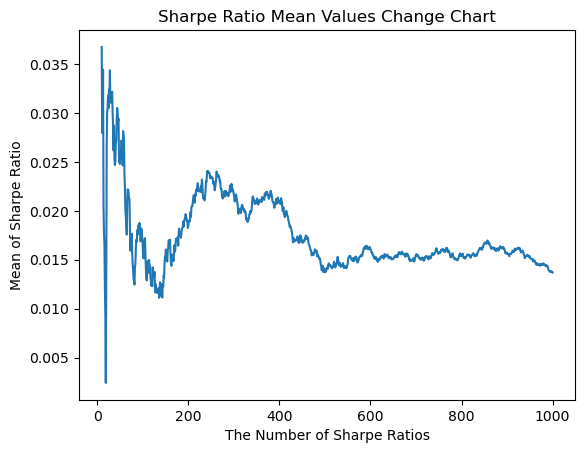

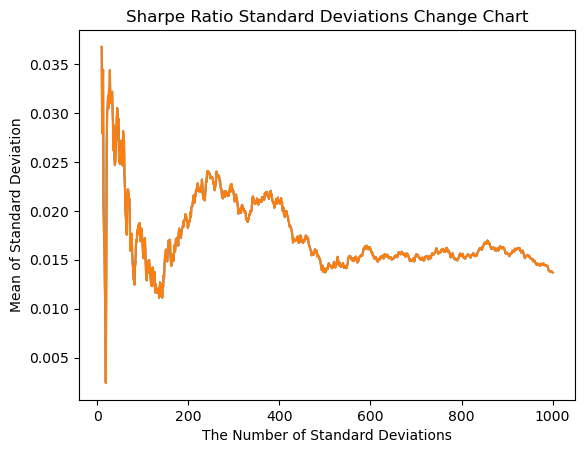

In [8]:
plt.title("Sharpe Ratio Mean Values Change Chart")
plt.plot(means_idx, means)
plt.xlabel("The Number of Sharpe Ratios")
plt.ylabel("Mean of Sharpe Ratio")
plt.show()
plt.title("Sharpe Ratio Standard Deviations Change Chart")
plt.plot(means_idx, means)
plt.xlabel("The Number of Standard Deviations")
plt.ylabel("Mean of Standard Deviation")
plt.plot(stds_idx, stds)
plt.show()